In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
file = 'Test_data_2017.csv'
df = pd.read_csv(file)


# Multiple Linear Regression

Multiple linear regression simply means that you have more than one feature variable.

For the housing price example, you may have features like this:

$Y_i$ = $Bias_0$ + $Weight_1$ sq_feet + $Weight_2$ num_bedrooms + $Weight_3$ num_bathrooms

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:

$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

Source: [Linear Regression](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

Generate a linear dataset with three features

In [4]:
df.head()

,Country_name,year,Life_Ladder,Log_GDP_percapita,Social_support,Healthy _life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954,0.496,0.371
1,Albania,2017,4.640,9.476,0.638,68.4,0.750,-0.029,0.876,0.669,0.334
2,Algeria,2017,5.249,9.354,0.807,65.7,0.437,-0.167,0.700,0.642,0.289
3,Argentina,2017,6.039,10.067,0.907,68.6,0.832,-0.186,0.841,0.809,0.292
4,Armenia,2017,4.288,9.402,0.698,66.6,0.614,-0.147,0.865,0.625,0.437


In [5]:
df.count()

Country_name                         147
year                                 147
Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

In [6]:
clean_data = df.drop(columns=['Country_name', 'year'])

In [8]:
clean_data.count()

Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

#### Define Features, Target
#### Split Data into Training & Test
#### Fit the model

In [10]:
X = clean_data.drop(columns='Life_Ladder', axis=1)
y= clean_data['Life_Ladder']

In [11]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)

Counter({6.167: 1,
         5.097: 1,
         3.108: 1,
         7.061: 1,
         6.094: 1,
         3.795: 1,
         4.647: 1,
         4.288: 1,
         7.074: 1,
         5.098: 1,
         4.18: 1,
         3.929: 1,
         5.122: 1,
         4.311: 1,
         5.713: 1,
         4.331: 1,
         4.678: 1,
         6.23: 1,
         4.514: 1,
         4.441: 1,
         6.928: 1,
         3.933: 1,
         6.41: 1,
         4.853: 1,
         5.249: 1,
         7.327: 1,
         5.579: 1,
         4.001: 1,
         7.294: 1,
         7.287: 1,
         6.201: 1,
         4.808: 1,
         4.046: 1,
         6.273: 1,
         7.579: 1,
         5.481: 1,
         5.038: 1,
         4.683: 1,
         4.28: 1,
         4.616: 1,
         6.192: 1,
         5.553: 1,
         5.605: 1,
         6.79: 1,
         2.817: 1,
         5.938: 1,
         5.711: 1,
         3.638: 1,
         4.884: 1,
         4.559: 1,
         4.476: 1,
         4.31: 1,
         5.829: 1,

In [ ]:
#The next line of code formats the data to meet the requirements of the Scikit-learn library
#X_train= clean_data.values.reshape(-1, 1)


In [ ]:
#X_train[:5]

In [ ]:
#X.shape

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting our model with all our features in X
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,5.166230,5.234
1,5.022636,4.737
2,7.027508,7.476
3,6.228747,6.568
4,4.549627,5.322
5,4.145311,4.424
6,4.609954,5.312
7,5.646863,6.065
8,4.628009,4.451
9,7.110298,7.060


In [38]:
score = model.score(X, y)
print(f"R2 Score:{score}")

R2 Score:0.7669835214595346


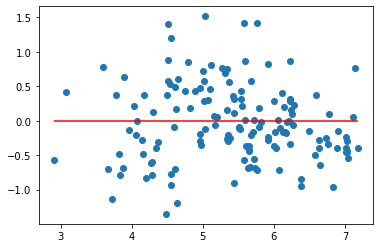

In [22]:
print(predictions.min())
print(predictions.max())


2.901060959654389
7.186349704880138


## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

Source: [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)

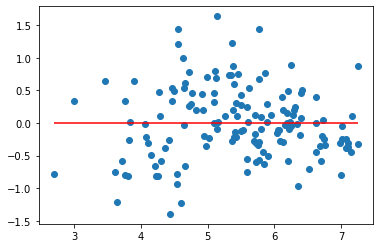

In [40]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red')
plt.show()

We want our predictions to be close to zero on the y-axis in this plot.